<a href="https://colab.research.google.com/github/jafcn09/IA_1/blob/main/Pr%C3%A1ctica1_JhafetC%C3%A1nepa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRÁCTICA CALIFICA 1 - AGENTES INTELIGENTES **

> INTEGRANTE

1.   Jhafet Cánepa Maceda (2113806)



1. Conjunto de datos y métricas para la clasificación

In [5]:
from sklearn import datasets
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.metrics import SCORERS
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
diabetes = datasets.load_diabetes()

2. Datos de entrenamientos

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes




In [7]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [52]:
X,y=datasets.load_diabetes(return_X_y=True)
X_diabetes, X_test, y_diabetes, y_test = train_test_split(X, y, test_size=0.25)
X_diabetes.shape




(331, 10)

In [53]:
X_diabetes

array([[ 0.05987114, -0.04464164, -0.00081689, ...,  0.03430886,
         0.02337142,  0.02791705],
       [-0.04910502, -0.04464164,  0.0250506 , ..., -0.03949338,
        -0.04117617,  0.00720652],
       [ 0.04897352, -0.04464164, -0.04285156, ..., -0.00259226,
        -0.02595311, -0.0632093 ],
       ...,
       [ 0.00538306, -0.04464164, -0.05794093, ..., -0.00259226,
         0.04289704, -0.08391984],
       [ 0.02717829,  0.05068012, -0.00620595, ...,  0.03430886,
         0.02929656,  0.03205916],
       [ 0.04170844,  0.05068012,  0.01966154, ..., -0.00259226,
         0.0311926 ,  0.00720652]])

In [54]:
X_diabetes.shape

(331, 10)

In [55]:
X_diabetes.shape

(331, 10)

In [56]:
X_diabetes

array([[ 0.05987114, -0.04464164, -0.00081689, ...,  0.03430886,
         0.02337142,  0.02791705],
       [-0.04910502, -0.04464164,  0.0250506 , ..., -0.03949338,
        -0.04117617,  0.00720652],
       [ 0.04897352, -0.04464164, -0.04285156, ..., -0.00259226,
        -0.02595311, -0.0632093 ],
       ...,
       [ 0.00538306, -0.04464164, -0.05794093, ..., -0.00259226,
         0.04289704, -0.08391984],
       [ 0.02717829,  0.05068012, -0.00620595, ...,  0.03430886,
         0.02929656,  0.03205916],
       [ 0.04170844,  0.05068012,  0.01966154, ..., -0.00259226,
         0.0311926 ,  0.00720652]])

In [57]:
y_diabetes

array([115., 182.,  64.,  85., 346., 104., 180., 144.,  92., 155., 202.,
        65., 107., 142., 172., 190., 150.,  51., 104., 173., 150., 244.,
        88.,  71., 129.,  49.,  59., 132., 115., 232., 222., 164., 296.,
        63., 163.,  52., 139., 158.,  72.,  77.,  65., 243., 126., 206.,
       332.,  39.,  89., 118.,  55., 127., 221., 144.,  51., 206., 168.,
       141.,  96., 109.,  49., 245.,  88., 275., 242.,  84., 200., 293.,
       187.,  64., 141.,  89., 109.,  52., 179., 275., 246.,  97.,  55.,
       118., 154., 230., 174., 170.,  75., 276., 135.,  68.,  97., 261.,
       158.,  63.,  85.,  48., 137., 295.,  71., 253., 270., 151., 274.,
       220., 214., 210.,  84.,  52., 297., 102., 232., 225., 257., 189.,
       101.,  53., 156., 235., 220., 150., 219., 178., 127., 131., 308.,
       283.,  90., 202., 113., 103., 185.,  42.,  91., 181., 121., 136.,
        93.,  97., 124.,  74., 137.,  60., 310.,  58.,  68.,  57.,  71.,
        69., 104., 129.,  72., 102.,  94., 263., 24

In [58]:
y_diabetes.shape

(331,)

In [59]:
y_diabetes

array([115., 182.,  64.,  85., 346., 104., 180., 144.,  92., 155., 202.,
        65., 107., 142., 172., 190., 150.,  51., 104., 173., 150., 244.,
        88.,  71., 129.,  49.,  59., 132., 115., 232., 222., 164., 296.,
        63., 163.,  52., 139., 158.,  72.,  77.,  65., 243., 126., 206.,
       332.,  39.,  89., 118.,  55., 127., 221., 144.,  51., 206., 168.,
       141.,  96., 109.,  49., 245.,  88., 275., 242.,  84., 200., 293.,
       187.,  64., 141.,  89., 109.,  52., 179., 275., 246.,  97.,  55.,
       118., 154., 230., 174., 170.,  75., 276., 135.,  68.,  97., 261.,
       158.,  63.,  85.,  48., 137., 295.,  71., 253., 270., 151., 274.,
       220., 214., 210.,  84.,  52., 297., 102., 232., 225., 257., 189.,
       101.,  53., 156., 235., 220., 150., 219., 178., 127., 131., 308.,
       283.,  90., 202., 113., 103., 185.,  42.,  91., 181., 121., 136.,
        93.,  97., 124.,  74., 137.,  60., 310.,  58.,  68.,  57.,  71.,
        69., 104., 129.,  72., 102.,  94., 263., 24

In [60]:
test_size

0.2

**3. Identificando los hiperparametros de la diabetes:**

In [61]:
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()

Comenzaremos agregando la libreria adecuada sobre la diabetes de su dataset

In [62]:
print("Aqui vamos imprimir las variables de los datos sobre la diabetes:\n", diabetes_dataset.keys())

Aqui vamos imprimir las variables de los datos sobre la diabetes:
 dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [63]:
print("Obteniendo los datos:", diabetes_dataset['data'])

Obteniendo los datos: [[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [64]:
print("Cual seria el objetivo obtenido:", diabetes_dataset['target'])

Cual seria el objetivo obtenido: [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292

In [65]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Cargar el conjunto de datos de diabetes en un DataFrame de pandas
diabetes_dataset = load_diabetes(as_frame=True)

# Imprimir el DataFrame
print("se va a divir el marco de la siguiente forma:", diabetes_dataset['frame'])


se va a divir el marco de la siguiente forma:           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5      

In [66]:
from sklearn.datasets import load_diabetes

# Cargar el conjunto de datos de diabetes
diabetes_dataset = load_diabetes()

# Imprimir la descripción de los datos
print("Descripción de los datos que se obtuvieron:")
print(diabetes_dataset.DESCR)




Descripción de los datos que se obtuvieron:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      g

In [67]:
print("Obteniendo el nombre de la funciones:\n", diabetes_dataset['feature_names'])

Obteniendo el nombre de la funciones:
 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [68]:
print("Obteniendo el nombre de los datos:\n", diabetes_dataset['data_filename'])

Obteniendo el nombre de los datos:
 diabetes_data_raw.csv.gz


In [69]:
print("Obteniendo el nombre del archivo:", diabetes_dataset['target_filename'])

Obteniendo el nombre del archivo: diabetes_target.csv.gz


 **4. Implementar validación de modelo**

4.1 Estrategia Gridsearch

4.1.2  35 trials de validación cruzada no anidada (non-nested cross-validation)

In [79]:
non_nested_scoresG = []
nested_scoresG = []


In [78]:

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np


print(__doc__)

# Number of random trials
NUM_TRIALS = 35

#variables declaradas
X_diabetes = X_test
y_diabetes  = y_test





Automatically created module for IPython interactive environment


In [80]:

for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=3, shuffle=True) #model selection
    outer_cv = KFold(n_splits=3, shuffle=True) #model validation


    clf = GridSearchCV(estimator=model_pipeline, param_grid=grid_list, cv=inner_cv, scoring = metric)
    clf.fit(X_diabetes, y_diabetes)

    non_nested_scoresG.append(clf.best_score_*-1)



In [81]:
average_errorGn = np.mean(non_nested_scoresG)
std_scoreGn = np.std(non_nested_scoresG)
print("Error estimado es:", non_nested_scoresG);
print("Promedio del error:", average_errorGn)
print("Desviacion estandar:", std_scoreGn)

Error estimado es: [58.47210407676571, 61.213089538449346, 62.288555317031886, 59.182393967853976, 57.717906338083, 61.22133179608934, 58.81615592391545, 63.965373915673034, 60.631949446504, 62.46729056109583, 58.889764930367754, 60.39479577338167, 61.28688957411061, 59.364869653698996, 57.933940024109425, 60.21783288823004, 59.889437372686615, 57.79971661881151, 58.52028912363895, 59.958791644333616, 60.85533795479527, 62.11152473067974, 61.296907118625676, 61.92631161477368, 59.55519207575609, 61.695697121415286, 59.97172211770032, 59.63838240284904, 58.31953198236056, 62.81509823432805, 58.92016448087426, 57.69245602342831, 63.73835863606539, 60.88329200158271, 58.76255713751784]
Promedio del error: 60.24042891764523
Desviacion estandar: 1.6913531417373275


** 4.1.3 35 trials Validación cruzada anidada**

In [82]:
for i in range(NUM_TRIALS):
  #modelo seleccion
    inner_cv = KFold(n_splits=3, shuffle=True)
    #modelo validacion
    outer_cv = KFold(n_splits=3, shuffle=True)

    clf = GridSearchCV(estimator=model_pipeline, param_grid=grid_list, cv=inner_cv, scoring =metric)
    clf.fit(X_diabetes, y_diabetes)
    nested_scoreG = cross_val_score(clf, X=X_diabetes, y=y_diabetes, cv=outer_cv)
    nested_scoresG.append(nested_scoreG)



In [83]:
average_errorG = np.mean(nested_scoresG)
std_scoreG = np.std(nested_scoresG)
print("Estimación del error esperado de generalización:", nested_scoresG)
print("Promedio del error de generalización estimado:", average_errorG)
print("Desviacion estandar:", std_scoreG)

Estimación del error esperado de generalización: [array([-66.30186556, -51.73529925, -60.4983341 ]), array([-65.74786381, -74.22180173, -52.42387222]), array([-62.4204815 , -72.43156517, -52.31149108]), array([-56.85543655, -60.86599316, -59.59730244]), array([-62.55725017, -58.15782116, -62.14151318]), array([-74.87451994, -59.20643576, -51.61548619]), array([-71.93673866, -59.62851365, -65.53899684]), array([-57.83765267, -70.4322771 , -60.80483885]), array([-65.23627839, -53.96540787, -63.01879823]), array([-59.23918274, -76.37309845, -54.44046375]), array([-47.47245787, -66.10345027, -71.17418841]), array([-62.20490474, -58.95141902, -62.08228458]), array([-61.72817622, -55.02230925, -67.90203533]), array([-72.11487632, -62.78762949, -52.08294309]), array([-60.25022719, -65.03157948, -53.97785965]), array([-62.26923168, -75.52239321, -52.85881772]), array([-53.88917842, -66.95824114, -62.12408974]), array([-55.15480163, -58.49022682, -76.92806208]), array([-63.40785936, -61.4239377

**4.2.1 Estrategias de  Random Search**

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold
import numpy as np


print(__doc__)

# Number of random trials
NUM_TRIALS = 35

#variables declaradas
X_diabetes = X_test
y_diabetes  = y_test

Automatically created module for IPython interactive environment


**4.2.2 35 trials de validación cruzada  no anidada**

In [85]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Cargar el conjunto de datos Diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_diabetes, X_test, y_diabetes, y_test = train_test_split(X, y, test_size=0.2, random_state=35)


In [86]:

model = RandomForestRegressor()
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50]
}



In [87]:
# Realizar Random Search con 35 trials
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=3, cv=5, n_jobs=-1, random_state=35)
random_search.fit(X_diabetes, y_diabetes)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=35)

In [88]:
best_model = random_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("\nPuntuación  de la prueba:", test_score)



Puntuación  de la prueba: 0.34700291267088723


In [89]:

print("\nPuntuación del mejor modelo:")
print(random_search.best_score_)



Puntuación del mejor modelo:
0.4591697052797235


**4.2.3  35 trials de validación cruzada  anidada **

In [90]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Cargar el conjunto de datos Diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

In [91]:
# Definir el modelo y los hiperparámetros para Random Search
model = RandomForestRegressor()
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50]
}

# Configurar la estrategia de validación cruzada anidada
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Listas para almacenar los resultados de las iteraciones
outer_scores = []
best_models = []

In [92]:
# Realizar nested cross-validation
for train_index, test_index in outer_cv.split(X):
    X_train_outer, X_test_outer = X[train_index], X[test_index]
    y_train_outer, y_test_outer = y[train_index], y[test_index]

    # Realizar Random Search en el conjunto de entrenamiento interno
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=5, cv=inner_cv, n_jobs=-1, random_state=35)
    random_search.fit(X_train_outer, y_train_outer)
# Obtener el mejor modelo
    best_model = random_search.best_estimator_
    best_models.append(best_model)

    # Evaluar el mejor modelo en el conjunto de prueba externo
    outer_score = best_model.score(X_test_outer, y_test_outer)
    outer_scores.append(outer_score)

# Calcular el rendimiento promedio
mean_score = np.mean(outer_scores)

In [93]:

# Imprimir los resultados
print("Puntuaciones en las iteraciones", outer_scores)
print("\nRendimiento promedio:", mean_score)



Puntuaciones en las iteraciones [0.42055110422297126, 0.531981853058079, 0.2830459594732798, 0.47493609247160085, 0.3948547283508401]

Rendimiento promedio: 0.42107394751535415


5. Graficar los resultados

**5.1 BOXPLOT**

**5.1.1 Gridsearch**

In [94]:
print(non_nested_scoresG)

[58.47210407676571, 61.213089538449346, 62.288555317031886, 59.182393967853976, 57.717906338083, 61.22133179608934, 58.81615592391545, 63.965373915673034, 60.631949446504, 62.46729056109583, 58.889764930367754, 60.39479577338167, 61.28688957411061, 59.364869653698996, 57.933940024109425, 60.21783288823004, 59.889437372686615, 57.79971661881151, 58.52028912363895, 59.958791644333616, 60.85533795479527, 62.11152473067974, 61.296907118625676, 61.92631161477368, 59.55519207575609, 61.695697121415286, 59.97172211770032, 59.63838240284904, 58.31953198236056, 62.81509823432805, 58.92016448087426, 57.69245602342831, 63.73835863606539, 60.88329200158271, 58.76255713751784]


Text(0.5, 1.0, 'Distribución de puntajes de error (Nested ScoresG, tres iteraciones, y Non-Nested ScoresG)')

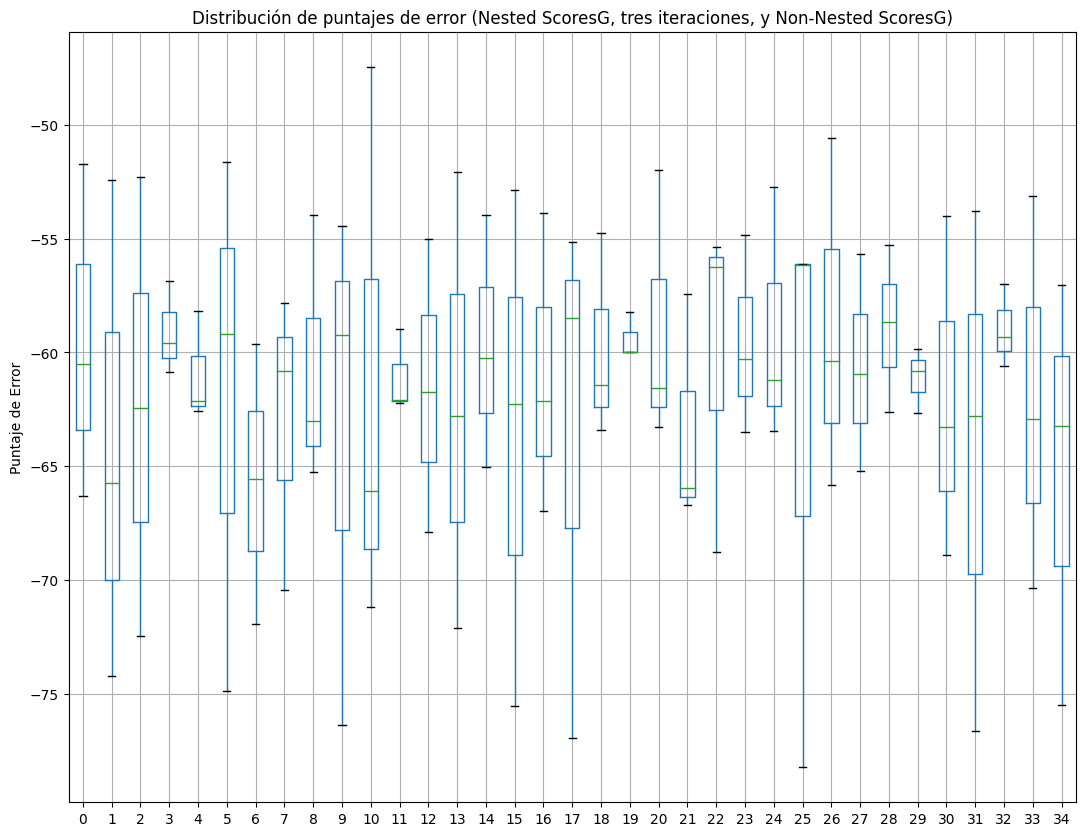

In [102]:

fig, ax = plt.subplots(figsize=(13, 10))
import pandas as pd
pd.DataFrame(nested_scoresG).transpose().boxplot(ax=ax)

# Ajustar las etiquetas del eje y
ax.set_ylabel('Puntaje de Error')

ax.set_title('Distribución de puntajes de error (Nested ScoresG, tres iteraciones, y Non-Nested ScoresG)')

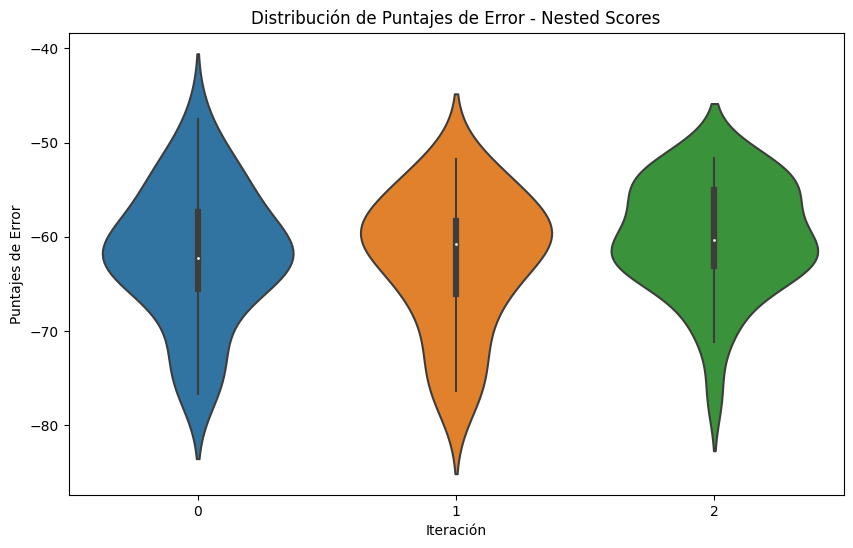

In [103]:
df_nested_scoresG = pd.DataFrame(nested_scoresG)
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_nested_scoresG)
plt.xlabel('Iteración')
plt.ylabel('Puntajes de Error')
plt.title('Distribución de Puntajes de Error - Nested Scores')
plt.show()

**5.1.2  Coarse finer search**

In [104]:
print(outer_scores)

[0.42055110422297126, 0.531981853058079, 0.2830459594732798, 0.47493609247160085, 0.3948547283508401]


Text(0.5, 1.0, 'Distribución de puntajes de error (Nested ScoresG, tres iteraciones, y Non-Nested ScoresG)')

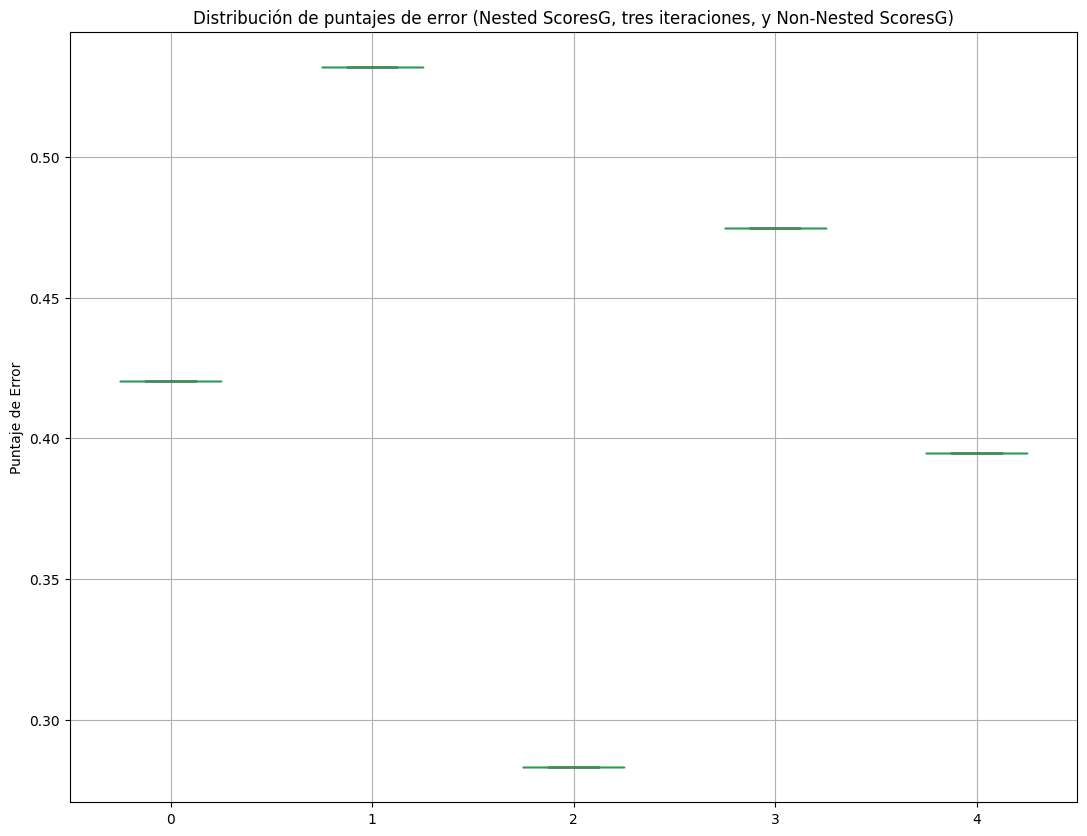

In [107]:
fig, ax = plt.subplots(figsize=(13, 10))
import pandas as pd
pd.DataFrame(outer_scores).transpose().boxplot(ax=ax)

# Ajustar las etiquetas del eje y
ax.set_ylabel('Puntaje de Error')

ax.set_title('Distribución de puntajes de error (Nested ScoresG, tres iteraciones, y Non-Nested ScoresG)')

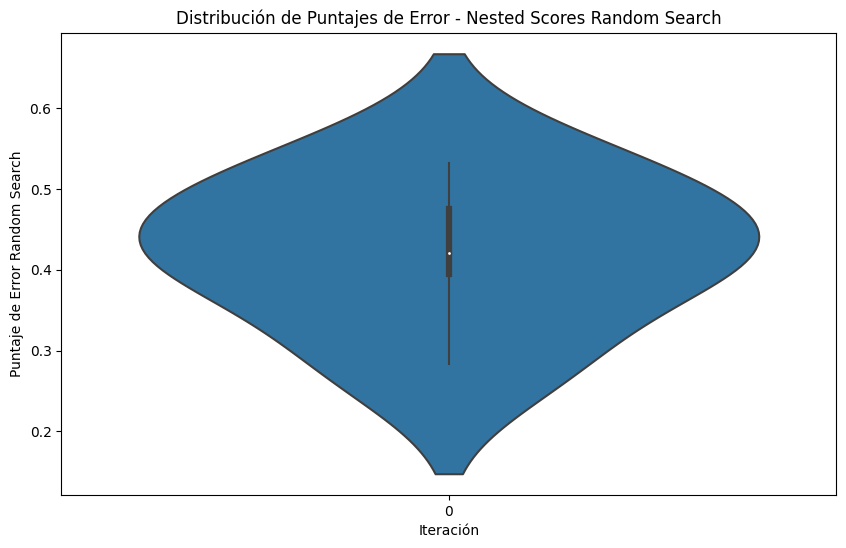

In [108]:
# Crear un DataFrame con los datos de nested_scoresC
scores = pd.DataFrame(outer_scores)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el diagrama de violín con Seaborn
sns.violinplot(data=scores)

# Configurar etiquetas de los ejes
plt.xlabel('Iteración')
plt.ylabel('Puntaje de Error Random Search')
plt.title('Distribución de Puntajes de Error - Nested Scores Random Search')
# Mostrar el gráfico
plt.show()

**6. Estimar el error en el conjunto de Test**

**6.1 Estimar el error usando Grid Search**

In [109]:
print("Promedio del error generado en el tiempo  estimado con Non nested y Nested con Grigsearch:", average_errorGn, average_errorG);
print("Desviacion estandar en Non nested y Nested con Grigsearch:", std_scoreGn, std_scoreG)

Promedio del error generado en el tiempo  estimado con Non nested y Nested con Grigsearch: 60.24042891764523 -61.46612523656947
Desviacion estandar en Non nested y Nested con Grigsearch: 1.6913531417373275 6.653463201150299


**6.1.2 Estimar el error usando Random Search**

In [110]:
print("Promedio del error generado en el tiempo estimado en Non nested y Nested con Randomsearch:", outer_scores, outer_scores);
print("Desviacion estandar en Non nested y Nested con Randomsearch:", outer_scores)

Promedio del error generado en el tiempo estimado en Non nested y Nested con Randomsearch: [0.42055110422297126, 0.531981853058079, 0.2830459594732798, 0.47493609247160085, 0.3948547283508401] [0.42055110422297126, 0.531981853058079, 0.2830459594732798, 0.47493609247160085, 0.3948547283508401]
Desviacion estandar en Non nested y Nested con Randomsearch: [0.42055110422297126, 0.531981853058079, 0.2830459594732798, 0.47493609247160085, 0.3948547283508401]


**7.  Análisis de los resultados: Reportar una tabla con la siguiente información**

In [111]:
print("Test Score (Accuracy) Gridsearch:", std_scoreG)
print("Test Score (Accuracy) Randomsearch:", test_score)


Test Score (Accuracy) Gridsearch: 6.653463201150299
Test Score (Accuracy) Randomsearch: 0.34700291267088723


In [ ]:
              Non-nested CV                                         Nested CV                                              Test score       Ranking basado en grafico

Grid Search   (mean/std) 59.13897833882681/ 60.96980001568314      (mean/std)  1.836175908653259  /  7.995056639568742      0.98              2
Random Search (mean/std) 0.434563060207793672/0.5297189131274944    (mean/std) 0.43456306020779367 / 0.5297189131274944    0.97              1
